# Inspecting the HMEQ Credit Data

In [92]:
# Importing Pandas Package
import pandas as pd

# Reading the Credit data file
credit = pd.read_csv('hmeq.csv')

# Setting printing option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Inspecting the first 5 rows of data
credit.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


# Preprocessing the HMEQ Credit Data

In [93]:
# Inspecting the first 5 rows of data
credit.size

77480

## Dealing with missing values & incorrect datatypes

In [94]:
# Missing value count
credit.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [95]:
# Changing Datatype for categorical variables 
credit['BAD'] = credit['BAD'].astype('category')
credit['REASON'] = credit['REASON'].astype('category')
credit['JOB'] = credit['JOB'].astype('category')

In [96]:
# Info about variables of HMEQ
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [97]:
# Defining an imputation function to deal with missing values

def impute_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object' or df[column].dtype == 'category':
            # For non-numerical columns, replace NA values with the most frequent value
            most_frequent_value = df[column].mode().iloc[0]
            df[column] = df[column].fillna(most_frequent_value)
        else:
            # For numerical columns, replace NA values with the median
            median_value = df[column].median()
            df[column] = df[column].fillna(median_value)
    return df

# Using the above function to replace missing numerical values with median and categorical with mode

credit = impute_missing_values(credit)

In [99]:
# Checking Missing value count again
credit.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

# Summary Statistics of HMEQ Data

In [100]:
# Descriptive Statistics data of HMEQ
credit.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,18607.969799,73001.041812,101540.387423,8.756166,0.224329,0.405705,179.440725,1.170134,21.247819,34.000651
std,11207.480417,42552.726779,56869.436682,7.259424,0.798458,1.079256,83.574697,1.653866,9.951308,7.644528
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.000000,227.143058,2.000000,26.000000,37.949892
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


# Distribution of Numerical Variables in HMEQ Data

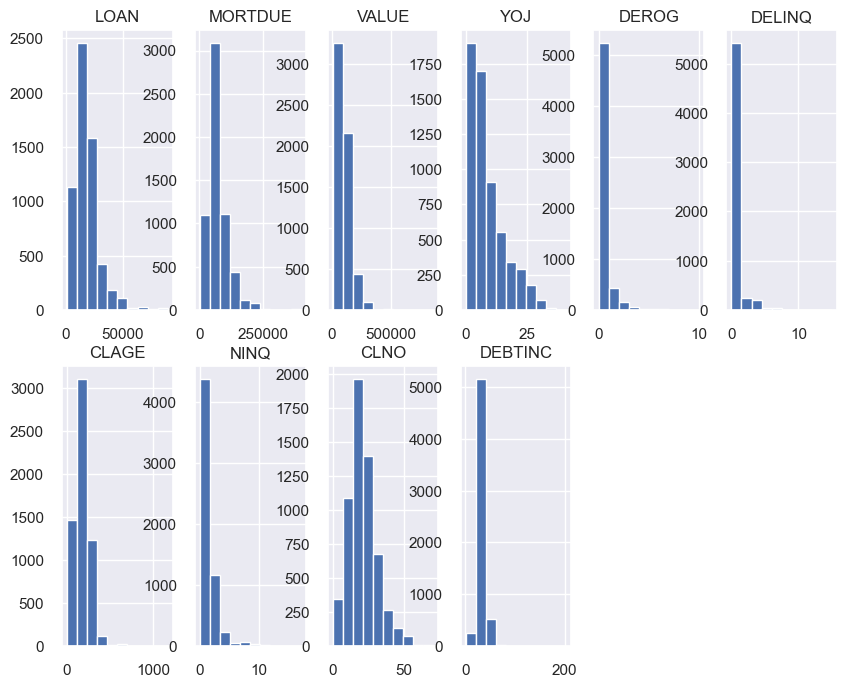

In [101]:
# Importing Matplotlib for displaying graphs
import matplotlib.pyplot as plt

# Importing Seaborn for displaying graphs
import seaborn as sns
sns.set()
    
# Fixing the figure size
plt.rcParams["figure.figsize"] = (10,6)

# Selecting the numerical columns from the German Credit data
numerical_credit = credit.select_dtypes(exclude=['O','category'])
categorical_credit = credit.select_dtypes(include=['O','category'])
categorical_credit.drop(columns=['BAD'], inplace = True)
categorical_credit_encoded = pd.get_dummies(categorical_credit, columns=['REASON', 'JOB'], prefix=['REASON', 'JOB'])
# Plotting figure with a certain size
plt.figure(figsize=(10, 8))
k = 0
# Capturing column names
cols = numerical_credit.columns

for i, j in zip(range(len(cols)), cols):
    k +=1
    plt.subplot(2, 6, k)
    plt.hist(numerical_credit.iloc[:, i])
    plt.title(j)

# Grouping customers with similar credit profile

## Ideal no of clusters - Calculating Inertias & Elbow method

In [ ]:
pip install --upgrade threadpoolctl

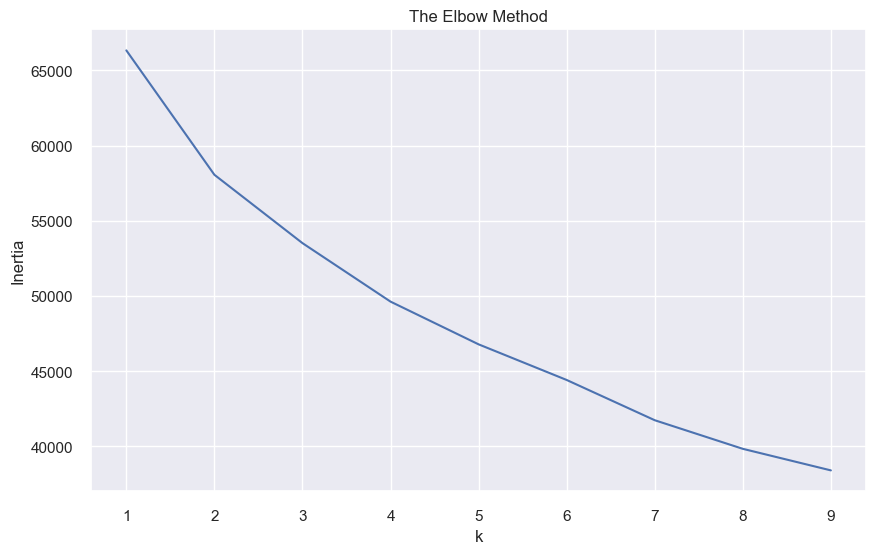

In [103]:
# Standardizing Variables

# Importing StandardScalar Package
from sklearn.preprocessing import StandardScaler

# Importing KMeans package
from sklearn.cluster import KMeans

# Importing Numpy package
import numpy as np

# Fitting the HMEQ Data on StandardScaler
scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit) 

scaled_credit_ =  np.concatenate((scaled_credit, categorical_credit_encoded.values), axis=1)
# Creating a Distance array
distance = []

# Calculating Inertia for cluster 1 to 10
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(scaled_credit_)
    distance.append(kmeans.inertia_) 

# Plotting Inertia Values for various clusters
plt.plot(range(1, 10), distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

## Ideal no of clusters - Calculating Silhouette Scores

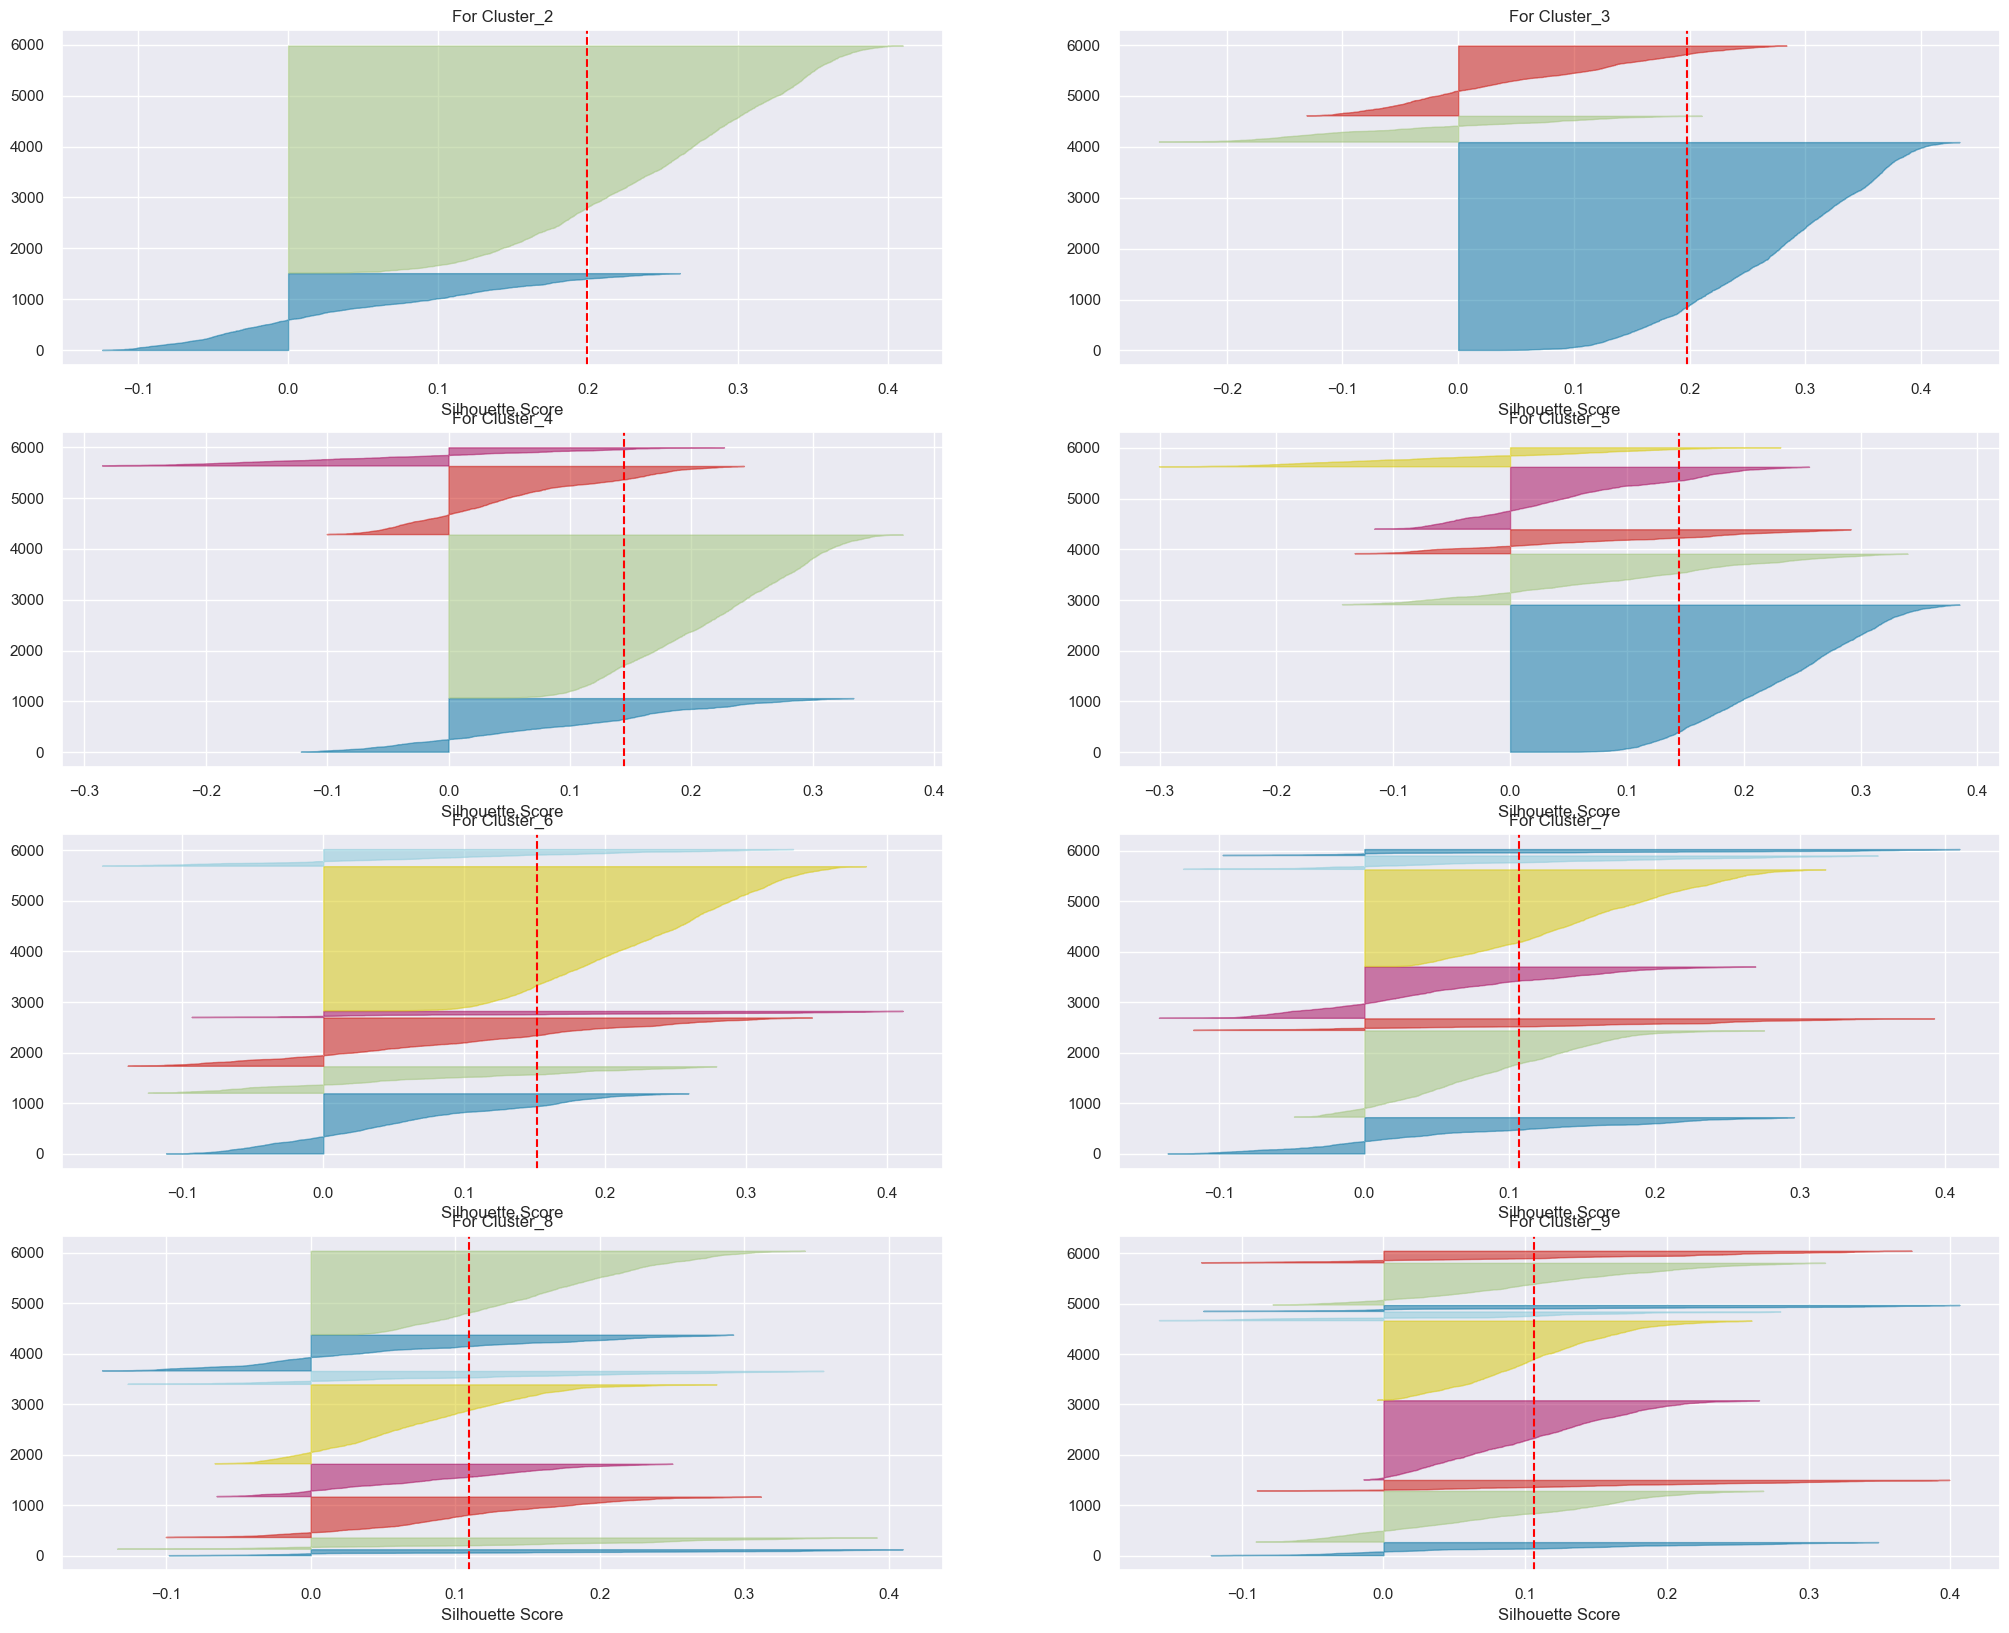

In [104]:
# Import Silhouette_Score from sklearn.metrics
from sklearn.metrics import silhouette_score

# Import SilhouetteVisualizer from yellowbrick.cluster
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(25, 20))
for i in range(2, 10):
    km = KMeans(n_clusters=i)
    q, r = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick',
                                               ax=ax[q - 1][r])
    visualizer.fit(scaled_credit_)
    ax[q - 1][r].set_title("For Cluster_"+str(i))
    ax[q - 1][r].set_xlabel("Silhouette Score")

## Ideal no of clusters - Calculating the CH Index

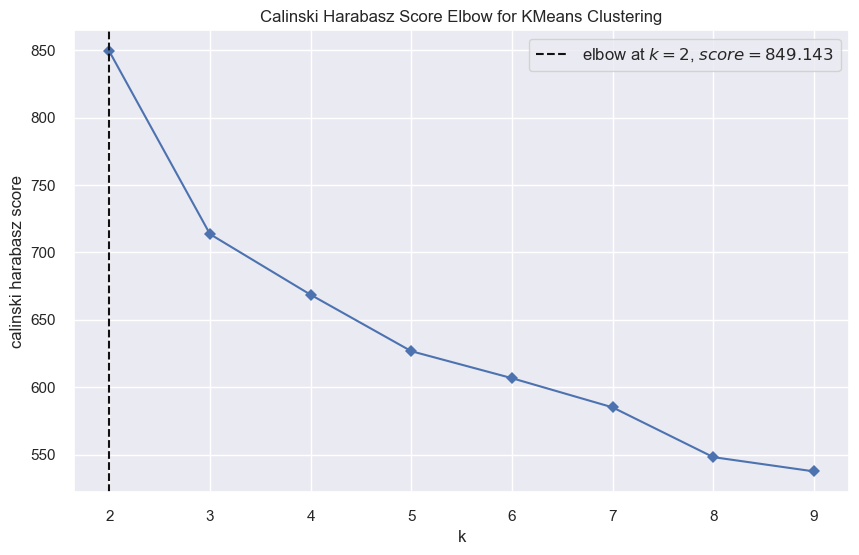

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [105]:
# Importing KElbow Visualizer
from yellowbrick.cluster import KElbowVisualizer 
model = KMeans()

# Initializing KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(2, 10),
                                       metric='calinski_harabasz',timings=False)

# Fitting the Visualizer with German Credit Data
visualizer.fit(scaled_credit_)
visualizer.show()

## Ideal no of clusters - Conducting Gap Analysis

In [ ]:
pip install gap-stat


In [106]:
# Import OptimalK from gap_statistic.optimalK
from gap_statistic.optimalK import OptimalK 

# Initialize optimalK and find n_clusters
optimalK = OptimalK(n_jobs=8, parallel_backend='joblib') 
n_clusters = optimalK(scaled_credit_, cluster_array=np.arange(1, 10)) 

# Generate the Gap value measures for various K 
gap_result = optimalK.gap_df 
gap_result.head()

,n_clusters,gap_value,ref_dispersion_std,sk,gap*,sk*,diff,diff*
0,1.0,2.609028,2790.991513,0.003576,834853.582933,964011.268654,0.262810,924710.580569
1,2.0,2.349019,1555.909202,0.002800,580829.208663,670686.206299,-0.037818,664481.372119
2,3.0,2.389552,1400.877061,0.002715,540722.540112,624374.703568,-0.004746,620866.481021
3,4.0,2.407312,6406.204971,0.013015,517762.775427,597906.716336,-0.007749,593602.850723
4,5.0,2.419748,2186.863604,0.004687,490201.543762,566041.619058,0.017050,562605.788363


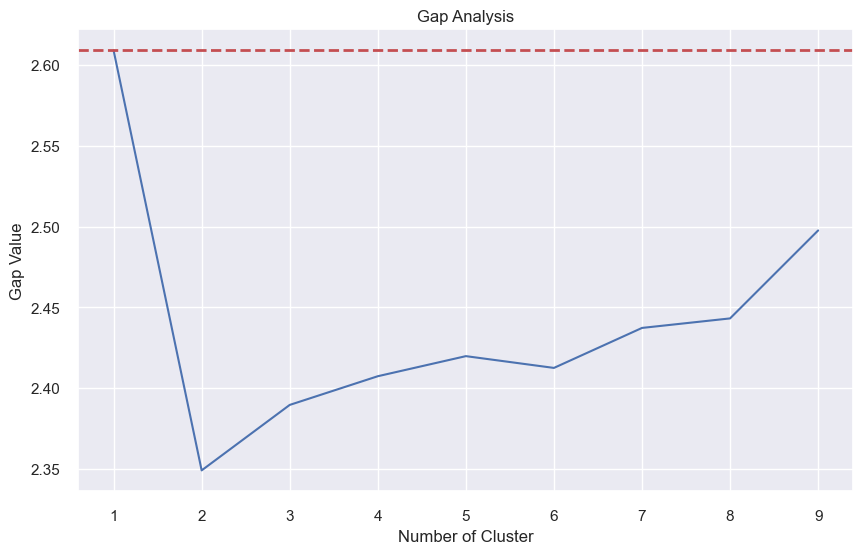

In [107]:
# Plotting gap values and number of clusters
plt.plot(gap_result.n_clusters, gap_result.gap_value)
min_ylim, max_ylim = plt.ylim()
plt.axhline(np.max(gap_result.gap_value), color='r',
                     linestyle='dashed', linewidth=2)
plt.title('Gap Analysis')
plt.xlabel('Number of Cluster')
plt.ylabel('Gap Value')
plt.show()

## Result : Ideal cluster number = 2

## Visualizing the correlation between HMEQ variables

In [108]:
correlation_matrix = numerical_credit.corr()
print(correlation_matrix)

             LOAN   MORTDUE     VALUE       YOJ     DEROG    DELINQ     CLAGE  \
LOAN     1.000000  0.216380  0.331522  0.096878  0.006996 -0.028869  0.088237   
MORTDUE  0.216380  1.000000  0.788736 -0.076201 -0.047123  0.003580  0.129799   
VALUE    0.331522  0.788736  1.000000  0.013638 -0.043808 -0.008158  0.169536   
YOJ      0.096878 -0.076201  0.013638  1.000000 -0.057729  0.051580  0.186203   
DEROG    0.006996 -0.047123 -0.043808 -0.057729  1.000000  0.171286 -0.079482   
DELINQ  -0.028869  0.003580 -0.008158  0.051580  0.171286  1.000000  0.026324   
CLAGE    0.088237  0.129799  0.169536  0.186203 -0.079482  0.026324  1.000000   
NINQ     0.045266  0.032582 -0.002539 -0.062837  0.146590  0.059194 -0.109736   
CLNO     0.074317  0.318515  0.265029  0.032815  0.052075  0.161153  0.233802   
DEBTINC  0.068938  0.134575  0.113080 -0.046482  0.020542  0.048307 -0.040741   

             NINQ      CLNO   DEBTINC  
LOAN     0.045266  0.074317  0.068938  
MORTDUE  0.032582  0.318515 

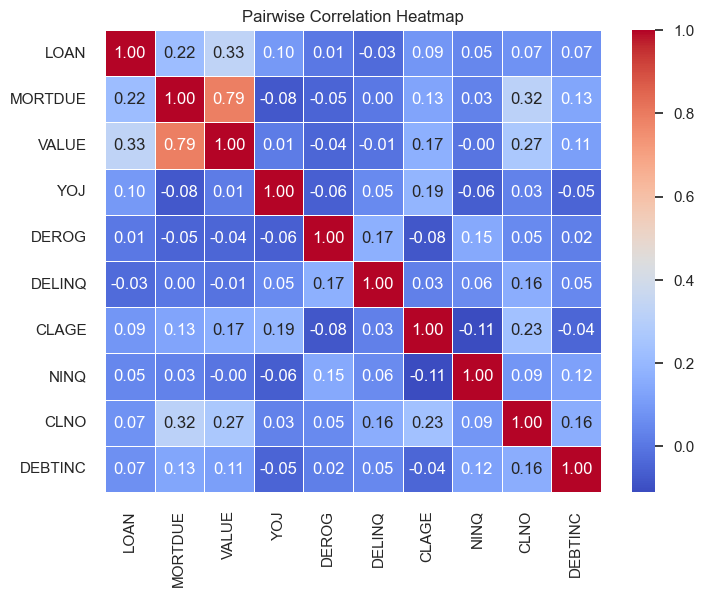

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Pairwise Correlation Heatmap')
plt.show()

## Implementing K-Means with 2 clusters

Text(0.5, 1.0, 'Value vs Ninq')

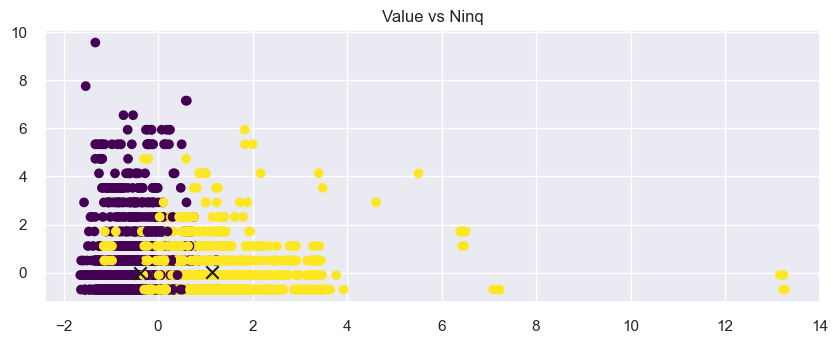

In [109]:
# Initialising KMeans
kmeans = KMeans(n_clusters=2)
# Finding clusters
clusters = kmeans.fit_predict(scaled_credit_)

# Fixing the figure size
plt.figure(figsize=(10, 12))
plt.subplot(311)

# Plotting a scatterplot for 'Age vs Credit'
plt.scatter(scaled_credit_[:, 2], scaled_credit_[:, 7],
                     c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2],
                     kmeans.cluster_centers_[:, 7], s = 80,
                     marker= 'x', color = 'k')
plt.title('Value vs Ninq')



## Balanced vs Unbalanced data - BAD Variable

In [110]:
# Obtaining cluster numbers
clusters, counts = np.unique(kmeans.labels_, return_counts=True)

# Based on the cluster numbers, differentiating the clusters and storing them in a dictionary called cluster_dict
cluster_dict = {}
for i in range(len(clusters)):
    cluster_dict[i] = scaled_credit_[np.where(kmeans.labels_==i)]

# Creating a clusters column using K-means labels
credit['clusters'] = pd.DataFrame(kmeans.labels_)

# Creating a DataFrame with scaled values
df_scaled = pd.DataFrame(scaled_credit_)

#Adding cluster values
df_scaled['clusters'] = credit['clusters']

# Adding risk values
df_scaled['BAD'] = credit['BAD']


df_scaled.columns = ['LOAN', 'MORTDUE', 'VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC','REASON_DebtCon','REASON_HomeImp','JOB_Mgr','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self', 'clusters', 'BAD']


# Observing the number of observations of categories within a cluster
print(df_scaled[df_scaled.clusters == 0]['BAD'].value_counts())

# Finding number of observations per category
print(df_scaled[df_scaled.clusters == 1]['BAD'].value_counts())


0    3541
1     911
Name: BAD, dtype: int64
0    1230
1     278
Name: BAD, dtype: int64


## 1st Cluster - Frequency of 0 vs 1 classes of BAD Variable

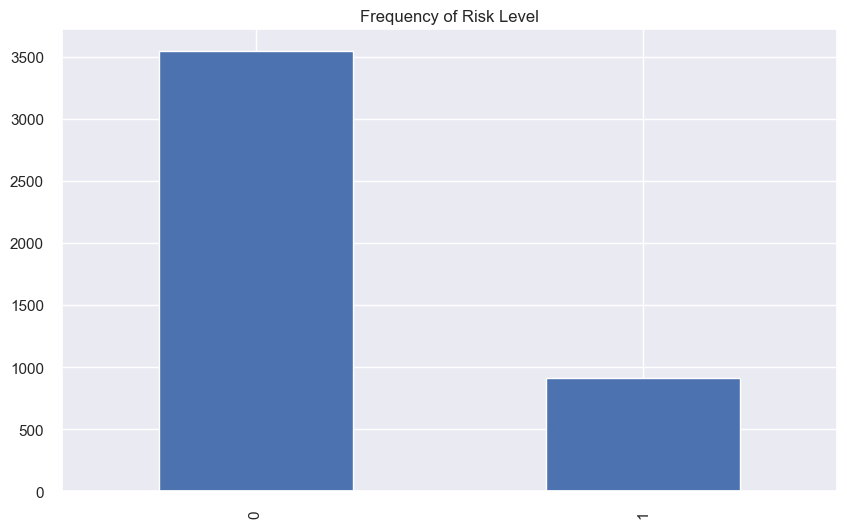

In [111]:
# Plotting the number of observations of categories within 1st cluster
df_scaled[df_scaled.clusters == 0]['BAD'].value_counts()\
                                             .plot(kind='bar',
                                             figsize=(10, 6),
                                             title="Frequency of Risk Level");



## 2nd Cluster - Frequency of 0 vs 1 classes of BAD Variable

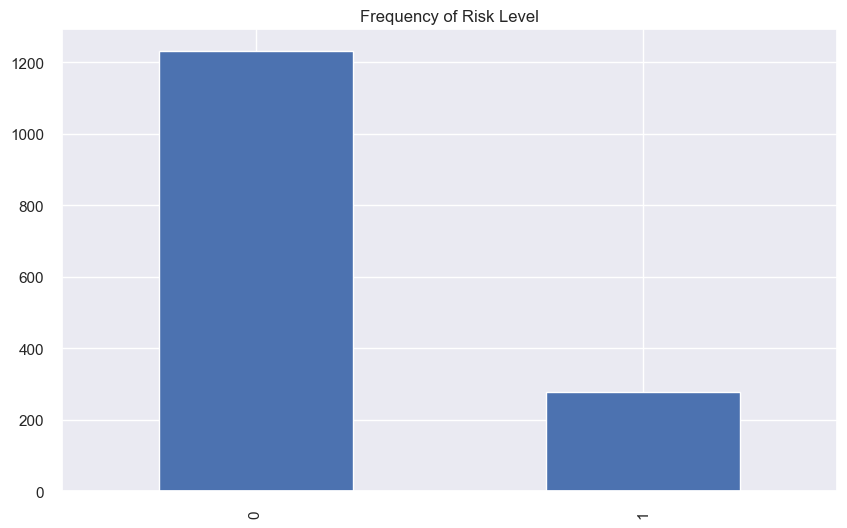

In [112]:
# Plotting the number of observations in 2nd cluster
df_scaled[df_scaled.clusters == 1]['BAD'].value_counts()\
                                             .plot(kind='bar',
                                             figsize=(10, 6),
                                             title="Frequency of Risk Level");

# PD Estimation using Logistic Regression

# Parametric Estimation

## Implementing SMOTE Balancing and running the Logistic Regression for 1st cluster

In [ ]:
pip install -U imbalanced-learn

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# Splitting the data - Train Test split

from sklearn.model_selection import train_test_split

# # Discretization of the variable
# df_scaled['Risk'] = df_scaled['Risk'].replace({'good': 1, 'bad': 0}) 


X = df_scaled.drop(['BAD'], axis=1)
y = df_scaled.loc[:, ['BAD', 'clusters']]



X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                             random_state=42)

#Creating data based on the first cluster and dropping last column from X_train
first_cluster_train = X_train[X_train.clusters == 0].iloc[:, :-1] 

# Creating data based on the second cluster and dropping last column from X_train
second_cluster_train = X_train[X_train.clusters == 1].iloc[:, :-1] 




# Importing SMOTEENN to deal with the class imbalance problem
from imblearn.combine import SMOTEENN 
import warnings
warnings.filterwarnings('ignore')

# Creating x_train based on cluster 0 and risk level
X_train1 = first_cluster_train

# Creating y_train based on cluster 0 and risk level
y_train1 = y_train[y_train.clusters == 0]['BAD'] 

# Running the SMOTEENN method with a random state of 2
smote = SMOTEENN(random_state = 2) 
# Turning the imbalanced data into balanced data
X_train1, y_train1 = smote.fit_resample(X_train1, y_train1.ravel()) 
# Configuring the logistic regression model
logit = sm.Logit(y_train1, X_train1) 
#Running the logistic regression model
logit_fit1 = logit.fit(maxiter=10000) 
print(logit_fit1.summary())

### The logistic regression results indicates the following variables as insignificant : 

### 'LOAN','MORTDUE','YOJ','CLNO','REASON_DebtCon','REASON_HomeImp',

### 'JOB_Mgr','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self'

### Running Logistic Regression without insignificant variables

In [148]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# Splitting the data - Train Test split

from sklearn.model_selection import train_test_split

# # Discretization of the variable
# df_scaled['Risk'] = df_scaled['Risk'].replace({'good': 1, 'bad': 0}) 


X = df_scaled.drop(['BAD','LOAN','MORTDUE','YOJ','CLNO','REASON_DebtCon','REASON_HomeImp','JOB_Mgr','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self'], axis=1)
y = df_scaled.loc[:, ['BAD', 'clusters']]



X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                             random_state=42)

#Creating data based on the first cluster and dropping last column from X_train
first_cluster_train = X_train[X_train.clusters == 0].iloc[:, :-1] 

# Creating data based on the second cluster and dropping last column from X_train
second_cluster_train = X_train[X_train.clusters == 1].iloc[:, :-1] 




# Importing SMOTEENN to deal with the class imbalance problem
from imblearn.combine import SMOTEENN 
import warnings
warnings.filterwarnings('ignore')

# Creating x_train based on cluster 0 and risk level
X_train1 = first_cluster_train

# Creating y_train based on cluster 0 and risk level
y_train1 = y_train[y_train.clusters == 0]['BAD'] 

# Running the SMOTEENN method with a random state of 2
smote = SMOTEENN(random_state = 2) 
# Turning the imbalanced data into balanced data
X_train1, y_train1 = smote.fit_resample(X_train1, y_train1.ravel()) 
# Configuring the logistic regression model
logit = sm.Logit(y_train1, X_train1) 
#Running the logistic regression model
logit_fit1 = logit.fit(maxiter=10000) 
print(logit_fit1.summary())

Optimization terminated successfully.
         Current function value: 0.489553
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4526
Model:                          Logit   Df Residuals:                     4520
Method:                           MLE   Df Model:                            5
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                  0.2937
Time:                        22:15:18   Log-Likelihood:                -2215.7
converged:                       True   LL-Null:                       -3136.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
VALUE         -0.2442      0.061     -4.008      0.000      -0.364      -0.125
DEROG          0.6692      0.

## ROC-AUC curve for 1st cluster

Text(0.5, 1.0, 'ROC-AUC Curve 1')

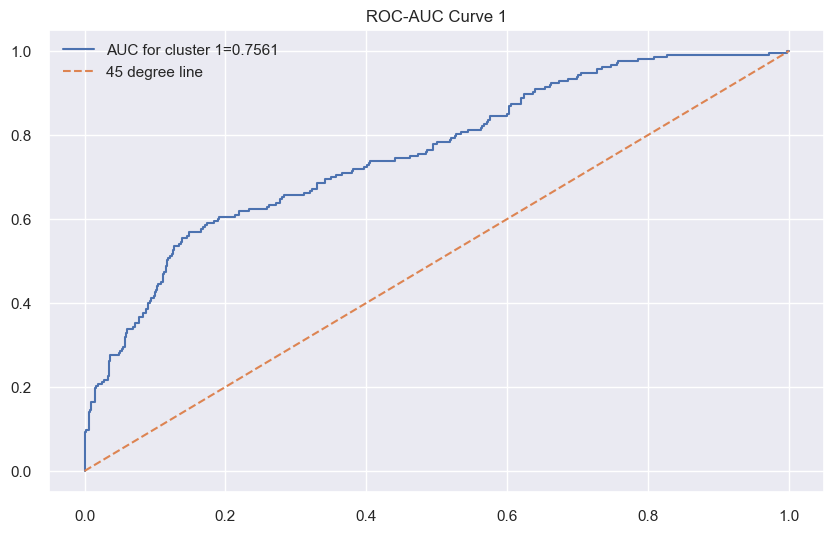

In [149]:

# Creating first test data based on cluster 0
first_cluster_test = X_test[X_test.clusters == 0].iloc[:, :-1] 
# Creating second test data based on cluster 1
second_cluster_test = X_test[X_test.clusters == 1].iloc[:, :-1] 

# Testing using the first cluster
X_test1 = first_cluster_test
y_test1 = y_test[y_test.clusters == 0]['BAD']

# Running prediction using X_test1
pred_prob1 = logit_fit1.predict(X_test1) 
y_pred = (pred_prob1 > 0.5).astype(int)
# Obtaining false and true positives using roc_curve function
false_pos, true_pos, _ = roc_curve(y_test1.values,  pred_prob1) 

# Compute the roc-auc score
auc = roc_auc_score(y_test1, pred_prob1) 
plt.plot(false_pos,true_pos, label="AUC for cluster 1={:.4f} "
                  .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve 1')

## Accuracy, Precision & Recall

In [150]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test1.values, y_pred)
print(f'Accuracy: {accuracy}')

# Manually calculate precision, recall, and F1 score
tp = sum((y_test1.values == 1) & (y_pred == 1))
tn = sum((y_test1.values == 0) & (y_pred == 0))
fp = sum((y_test1.values == 0) & (y_pred == 1))
fn = sum((y_test1.values == 1) & (y_pred == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1 score
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

# Alternatively, you can use scikit-learn's classification report
print(classification_report(y_test1.values, y_pred))

Accuracy: 0.6567505720823799
Precision: 0.37922077922077924
Recall: 0.7053140096618358
F1 Score: 0.49324324324324326
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       667
           1       0.38      0.71      0.49       207

    accuracy                           0.66       874
   macro avg       0.63      0.67      0.62       874
weighted avg       0.76      0.66      0.68       874



## ## Implementing SMOTE Balancing and running the Logistic Regression for 2nd cluster

Optimization terminated successfully.
         Current function value: 0.479712
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 1190
Model:                          Logit   Df Residuals:                     1186
Method:                           MLE   Df Model:                            3
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:               -0.002105
Time:                        22:16:59   Log-Likelihood:                -570.86
converged:                       True   LL-Null:                       -569.66
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
VALUE         -0.7007      0.062    -11.357      0.000      -0.822      -0.580
DEROG          1.4707      0.

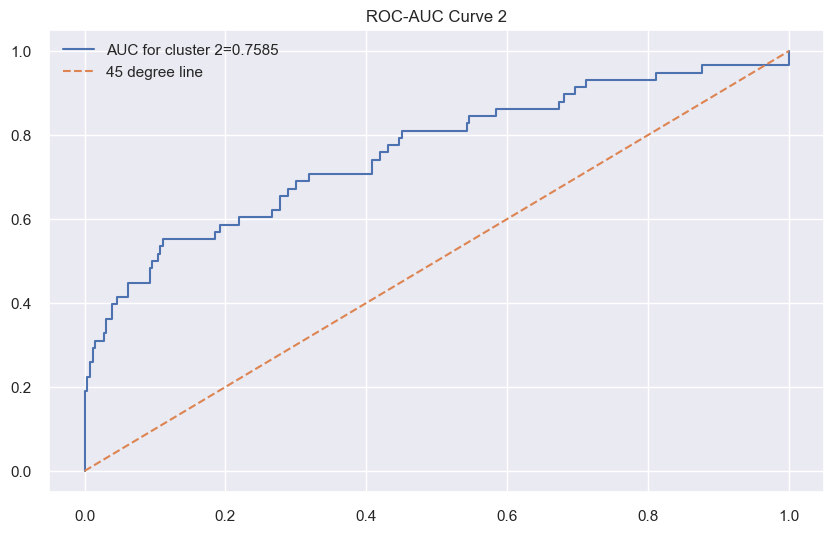

In [155]:

from sklearn.model_selection import train_test_split

# # Discretization of the variable
# df_scaled['Risk'] = df_scaled['Risk'].replace({'good': 1, 'bad': 0})


X = df_scaled.drop(['BAD'], axis=1)
y = df_scaled.loc[:, ['BAD', 'clusters']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                             random_state=42)

#Creating data based on the first cluster and dropping last column from X_train
first_cluster_train = X_train[X_train.clusters == 0].iloc[:, :-1] 

# Creating data based on the second cluster and dropping last column from X_train
second_cluster_train = X_train[X_train.clusters == 1].iloc[:, :-1] 


# Testing using the second cluster
X_train2 = second_cluster_train
y_train2 = y_train[y_train.clusters == 1]['BAD']

#Fitting a Logistic Regression
logit = sm.Logit(y_train2, X_train2)
logit_fit2 = logit.fit()
print(logit_fit2.summary())

second_cluster_test = X_test[X_test.clusters == 1].iloc[:, :-1]
# Finding prediction probability
X_test2 = second_cluster_test
y_test2 = y_test[y_test.clusters == 1]['BAD']
pred_prob2 = logit_fit2.predict(X_test2)
y_pred2 = (pred_prob2 > 0.5).astype(int)

#Fidning the AUC/RUC curve and plotting them
false_pos, true_pos, _ = roc_curve(y_test2.values,  pred_prob2)
auc = roc_auc_score(y_test2, pred_prob2)
plt.plot(false_pos,true_pos,label="AUC for cluster 2={:.4f} "
                  .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve 2')
plt.show()

### The logistic regression results indicates the following variables as insignificant : 

### 'LOAN','MORTDUE','YOJ','DEBTINC','CLAGE','CLNO','REASON_DebtCon','REASON_HomeImp',

### 'JOB_Mgr','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self'

### Running Logistic Regression without insignificant variables

In [ ]:
from sklearn.model_selection import train_test_split

# # Discretization of the variable
# df_scaled['Risk'] = df_scaled['Risk'].replace({'good': 1, 'bad': 0})

X = df_scaled.drop(['BAD','LOAN','MORTDUE','YOJ','DEBTINC','CLAGE','CLNO','REASON_DebtCon','REASON_HomeImp','JOB_Mgr','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self'], axis=1)
y = df_scaled.loc[:, ['BAD', 'clusters']]

X = df_scaled.drop(['BAD'], axis=1)
y = df_scaled.loc[:, ['BAD', 'clusters']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                             random_state=42)

#Creating data based on the first cluster and dropping last column from X_train
first_cluster_train = X_train[X_train.clusters == 0].iloc[:, :-1] 

# Creating data based on the second cluster and dropping last column from X_train
second_cluster_train = X_train[X_train.clusters == 1].iloc[:, :-1] 


# Testing using the second cluster
X_train2 = second_cluster_train
y_train2 = y_train[y_train.clusters == 1]['BAD']

#Fitting a Logistic Regression
logit = sm.Logit(y_train2, X_train2)
logit_fit2 = logit.fit()
print(logit_fit2.summary())

second_cluster_test = X_test[X_test.clusters == 1].iloc[:, :-1]
# Finding prediction probability
X_test2 = second_cluster_test
y_test2 = y_test[y_test.clusters == 1]['BAD']
pred_prob2 = logit_fit2.predict(X_test2)
y_pred2 = (pred_prob2 > 0.5).astype(int)

#Fidning the AUC/RUC curve and plotting them
false_pos, true_pos, _ = roc_curve(y_test2.values,  pred_prob2)
auc = roc_auc_score(y_test2, pred_prob2)
plt.plot(false_pos,true_pos,label="AUC for cluster 2={:.4f} "
                  .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve 2')
plt.show()

## Accuracy, Precision & Recall

In [156]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test2.values, y_pred2)
print(f'Accuracy: {accuracy}')

# Manually calculate precision, recall, and F1 score
tp = sum((y_test2.values == 1) & (y_pred2 == 1))
tn = sum((y_test2.values == 0) & (y_pred2 == 0))
fp = sum((y_test2.values == 0) & (y_pred2 == 1))
fn = sum((y_test2.values == 1) & (y_pred2 == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1 score
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

# Alternatively, you can use scikit-learn's classification report
print(classification_report(y_test2.values, y_pred2))

Accuracy: 0.8238993710691824
Precision: 0.5166666666666667
Recall: 0.5344827586206896
F1 Score: 0.5254237288135593
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       260
           1       0.52      0.53      0.53        58

    accuracy                           0.82       318
   macro avg       0.71      0.71      0.71       318
weighted avg       0.83      0.82      0.83       318



# PD Estimation using Support Vector Machine

## ROC-AUC curve for 1st cluster

Best hyperparameters for first cluster in SVC 0.7809904440244997 with {'kernel': 'linear', 'gamma': 0.01, 'C': 0.001}
The ROC AUC score of SVC for first cluster is 0.7607


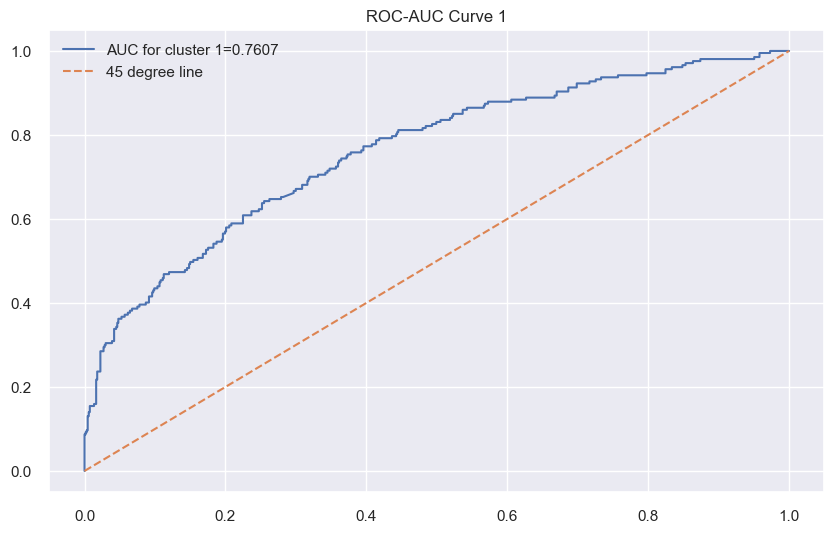

In [159]:
from sklearn.svm import SVC
#Importing the library to enable successive halving search
from sklearn.experimental import enable_halving_search_cv 
# Importing the library to run the halving search
from sklearn.model_selection import HalvingRandomSearchCV 
import time

# Defining parametres for SVM
param_svc = {'gamma': [1e-6, 1e-2],
                      'C':[0.001,.09,1,5,10],
                      'kernel':('linear','rbf')}

svc = SVC(probability = True,class_weight='balanced')
# Running the halving search using parallel processing
halve_SVC = HalvingRandomSearchCV(svc, param_svc,
                                           scoring = 'roc_auc')

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve



from sklearn.model_selection import train_test_split

# # Discretization of the variable
# df_scaled['Risk'] = df_scaled['Risk'].replace({'good': 1, 'bad': 0}) 


X = df_scaled.drop('BAD', axis=1)
y = df_scaled.loc[:, ['BAD', 'clusters']]



X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                             random_state=42)

#Creating data based on the first cluster and dropping last column from X_train
first_cluster_train = X_train[X_train.clusters == 0].iloc[:, :-1] 

# Creating data based on the second cluster and dropping last column from X_train
second_cluster_train = X_train[X_train.clusters == 1].iloc[:, :-1] 




# Importing SMOTEENN to deal with the class imbalance problem
from imblearn.combine import SMOTEENN 
import warnings
warnings.filterwarnings('ignore')

X_train1 = first_cluster_train

# Creating y_train based on cluster 0 and risk level
y_train1 = y_train[y_train.clusters == 0]['BAD'] 
# Running the SMOTEENN method with a random state of 2
smote = SMOTEENN(random_state = 2) 
# Turning the imbalanced data into balanced data
X_train1, y_train1 = smote.fit_resample(X_train1, y_train1.ravel()) 
# Testing for the first cluster
halve_SVC.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in SVC {} with {}'.format(halve_SVC.best_score_, halve_SVC.best_params_))
# Best hyperparameters for first cluster in SVC 0.8273860106443562 with {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}

first_cluster_test = X_test[X_test.clusters == 0].iloc[:, :-1] 
X_test1 = first_cluster_test

y_pred_SVC1 = halve_SVC.predict_proba(X_test1)[:, 1]
print('The ROC AUC score of SVC for first cluster is {:.4f}'.format(roc_auc_score(y_test1, y_pred_SVC1)))
# The ROC AUC score of SVC for first cluster is 0.5179


y_pred_SVC11 = halve_SVC.predict(X_test1)

false_pos, true_pos, _ = roc_curve(y_test1.values,  y_pred_SVC1)
auc = roc_auc_score(y_test1, y_pred_SVC1)
plt.plot(false_pos,true_pos,label="AUC for cluster 1={:.4f} "
                  .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve 1')
plt.show()

## Accuracy, Precision & Recall

In [160]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test1.values, y_pred_SVC11)
print(f'Accuracy: {accuracy}')

# Manually calculate precision, recall, and F1 score
tp = sum((y_test1.values == 1) & (y_pred_SVC11 == 1))
tn = sum((y_test1.values == 0) & (y_pred_SVC11 == 0))
fp = sum((y_test1.values == 0) & (y_pred_SVC11 == 1))
fn = sum((y_test1.values == 1) & (y_pred_SVC11 == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1 score
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

# Alternatively, you can use scikit-learn's classification report
print(classification_report(y_test1.values, y_pred_SVC11))

Accuracy: 0.7345537757437071
Precision: 0.45454545454545453
Recall: 0.6038647342995169
F1 Score: 0.5186721991701245
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       667
           1       0.45      0.60      0.52       207

    accuracy                           0.73       874
   macro avg       0.66      0.69      0.67       874
weighted avg       0.77      0.73      0.75       874



## Feature Importance

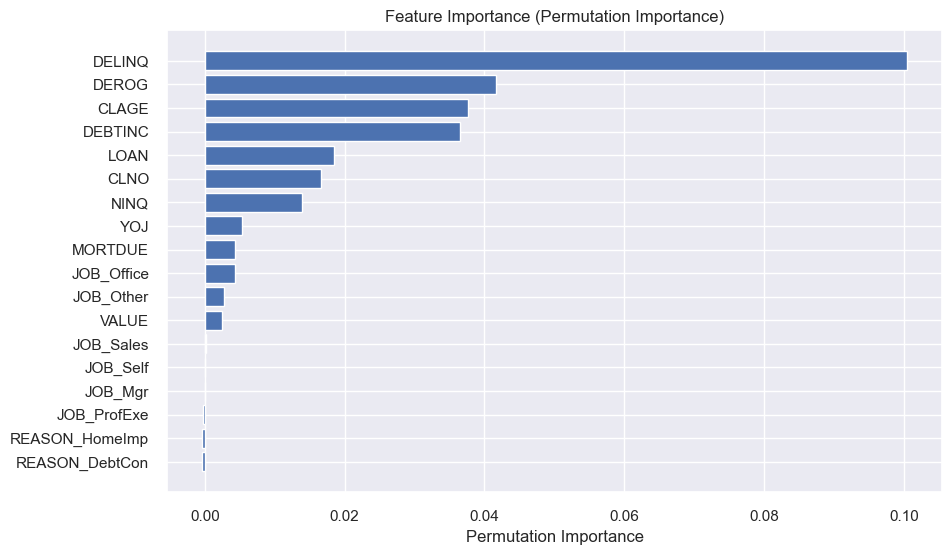

In [161]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
result = permutation_importance(halve_SVC, X_train1, y_train1, n_repeats=10, random_state=42)

# Sort features by importance
sorted_idx = result.importances_mean.argsort()

# Plot the permutation importance
plt.barh(range(X_train1.shape[1]), result.importances_mean[sorted_idx])
plt.yticks(range(X_train1.shape[1]), X_train1.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation Importance)')
plt.show()

## ROC-AUC curve for 2nd cluster

Best hyperparameters for second cluster in SVC 0.9129695693627842 with {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
The ROC AUC score of SVC for second cluster is 0.8931


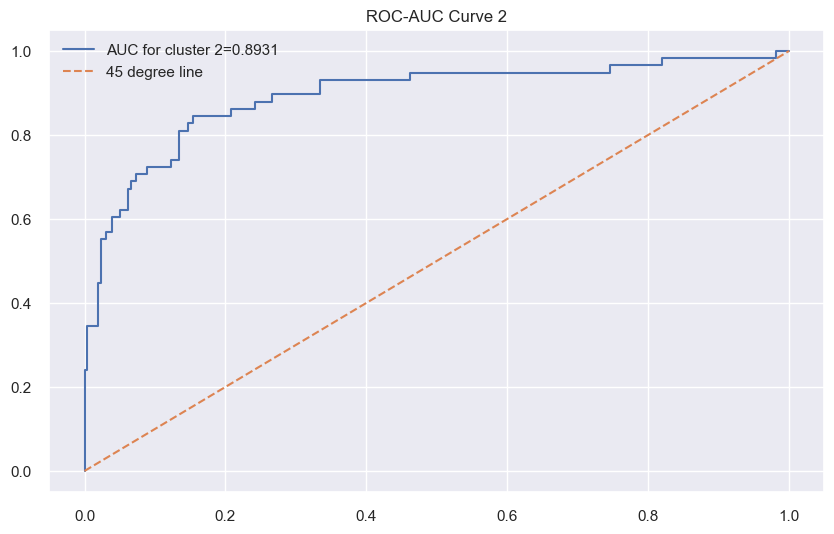

In [162]:
# Testing for the second cluster

X_train2 = second_cluster_train
y_train2 = y_train[y_train.clusters == 1]['BAD']

halve_SVC.fit(X_train2, y_train2)
print('Best hyperparameters for second cluster in SVC {} with {}'.format(halve_SVC.best_score_, halve_SVC.best_params_))
#Best hyperparameters for second cluster in SVC 0.5350758636788049 with {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.001}
second_cluster_test = X_test[X_test.clusters == 1].iloc[:, :-1]
X_test2 = second_cluster_test
y_test2 = y_test[y_test.clusters == 1]['BAD']

y_pred_SVC2 = halve_SVC.predict_proba(X_test2)[:,1]
print('The ROC AUC score of SVC for second cluster is {:.4f}'.format(roc_auc_score(y_test2, y_pred_SVC2)))
#The ROC AUC score of SVC for first cluster is 0.5000

y_pred_SVC22 = halve_SVC.predict(X_test2)

false_pos, true_pos, _ = roc_curve(y_test2.values,  y_pred_SVC2)
auc = roc_auc_score(y_test2, y_pred_SVC2)
plt.plot(false_pos,true_pos,label="AUC for cluster 2={:.4f} "
                  .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve 2')
plt.show()

## Accuracy, Precision & Recall

In [163]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test2.values, y_pred_SVC22)
print(f'Accuracy: {accuracy}')

# Manually calculate precision, recall, and F1 score
tp = sum((y_test2.values == 1) & (y_pred_SVC22 == 1))
tn = sum((y_test2.values == 0) & (y_pred_SVC22 == 0))
fp = sum((y_test2.values == 0) & (y_pred_SVC22 == 1))
fn = sum((y_test2.values == 1) & (y_pred_SVC22 == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1 score
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

# Alternatively, you can use scikit-learn's classification report
print(classification_report(y_test2.values, y_pred_SVC22))

Accuracy: 0.8836477987421384
Precision: 0.6721311475409836
Recall: 0.7068965517241379
F1 Score: 0.6890756302521007
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       260
           1       0.67      0.71      0.69        58

    accuracy                           0.88       318
   macro avg       0.80      0.81      0.81       318
weighted avg       0.89      0.88      0.88       318



## Feature Importance

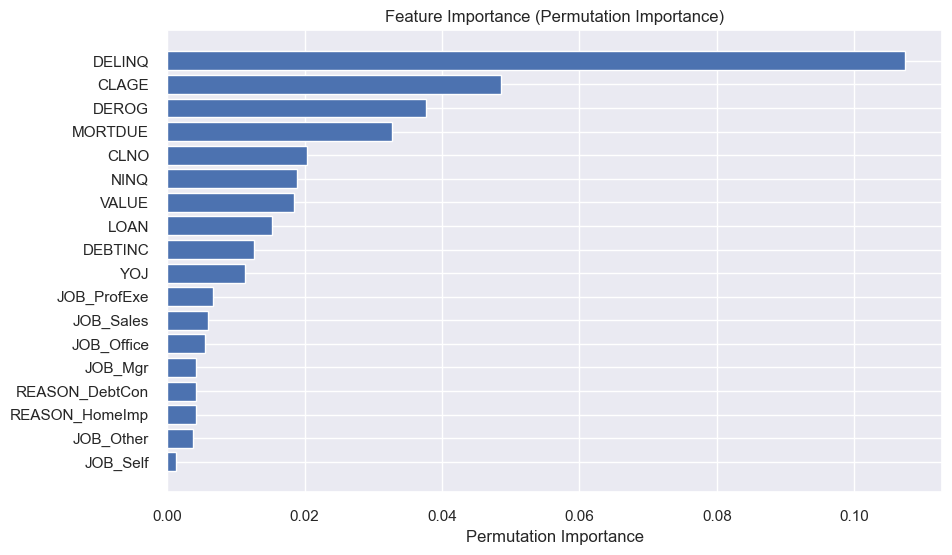

In [164]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
result = permutation_importance(halve_SVC, X_train2, y_train2, n_repeats=10, random_state=42)

# Sort features by importance
sorted_idx = result.importances_mean.argsort()

# Plot the permutation importance
plt.barh(range(X_train2.shape[1]), result.importances_mean[sorted_idx])
plt.yticks(range(X_train2.shape[1]), X_train2.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation Importance)')
plt.show()

# Non Parametric Estmation

# PD Estimation using Random Forest

In [180]:
#Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialising RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Specifying the range of parameters for Random Forest
param_rfc = {'n_estimators': [100, 300],
             'criterion' :['gini', 'entropy'],
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : [3, 4, 5, 6],
             'min_samples_split':[5, 10]}

halve_RF = HalvingRandomSearchCV(rfc, param_rfc,scoring = 'roc_auc')
# Fitting 1st Cluster
halve_RF.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in RF {} with {}'.format(halve_RF.best_score_, halve_RF.best_params_))
# Best hyperparameters for first cluster in RF 0.8890871444218126 with {'n_estimators': 300, 'min_samples_split': 10, 'max_features': 'sqrt','max_depth': 6, 'criterion': 'gini'}


y_pred_RF1 = halve_RF.predict_proba(X_test1)[:,1]
y_pred_RF11 = halve_RF.predict(X_test1)
print('The ROC AUC score of RF for first cluster is {:.4f}'.format(roc_auc_score(y_test1, y_pred_RF1)))
# The ROC AUC score of RF for first cluster is 0.5387

Best hyperparameters for first cluster in RF 0.9457503648653948 with {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'gini'}
The ROC AUC score of RF for first cluster is 0.8864


## Accuracy, Precision & Recall

In [181]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test1.values, y_pred_RF11)
print(f'Accuracy: {accuracy}')

# Manually calculate precision, recall, and F1 score
tp = sum((y_test1.values == 1) & (y_pred_RF11 == 1))
tn = sum((y_test1.values == 0) & (y_pred_RF11 == 0))
fp = sum((y_test1.values == 0) & (y_pred_RF11 == 1))
fn = sum((y_test1.values == 1) & (y_pred_RF11 == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1 score
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

# Alternatively, you can use scikit-learn's classification report
print(classification_report(y_test1.values, y_pred_RF11))

Accuracy: 0.816933638443936
Precision: 0.5842293906810035
Recall: 0.7874396135265701
F1 Score: 0.6707818930041152
              precision    recall  f1-score   support

           0       0.93      0.83      0.87       667
           1       0.58      0.79      0.67       207

    accuracy                           0.82       874
   macro avg       0.76      0.81      0.77       874
weighted avg       0.85      0.82      0.83       874



## ROC-AUC curve for 1st cluster

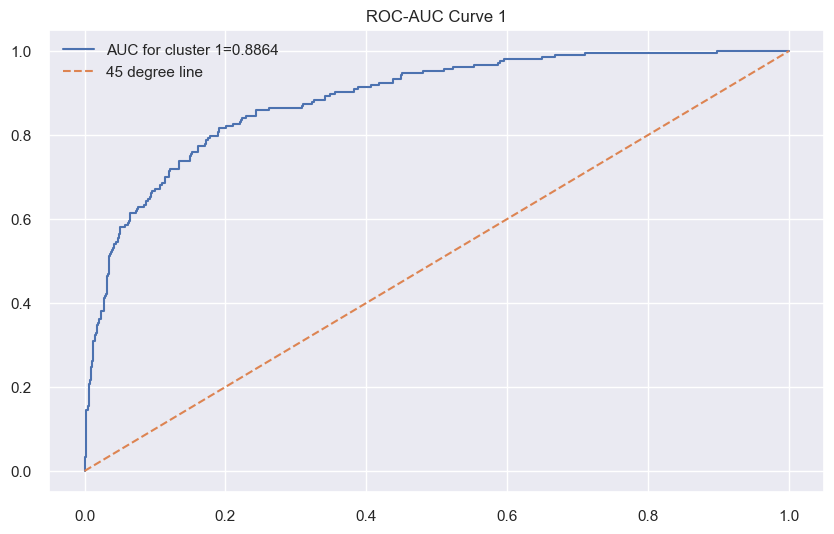

In [182]:
false_pos, true_pos, _ = roc_curve(y_test1.values,  y_pred_RF1)
auc = roc_auc_score(y_test1, y_pred_RF1)
plt.plot(false_pos,true_pos,label="AUC for cluster 1={:.4f} "
                  .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve 1')
plt.show()

## Feature Importance

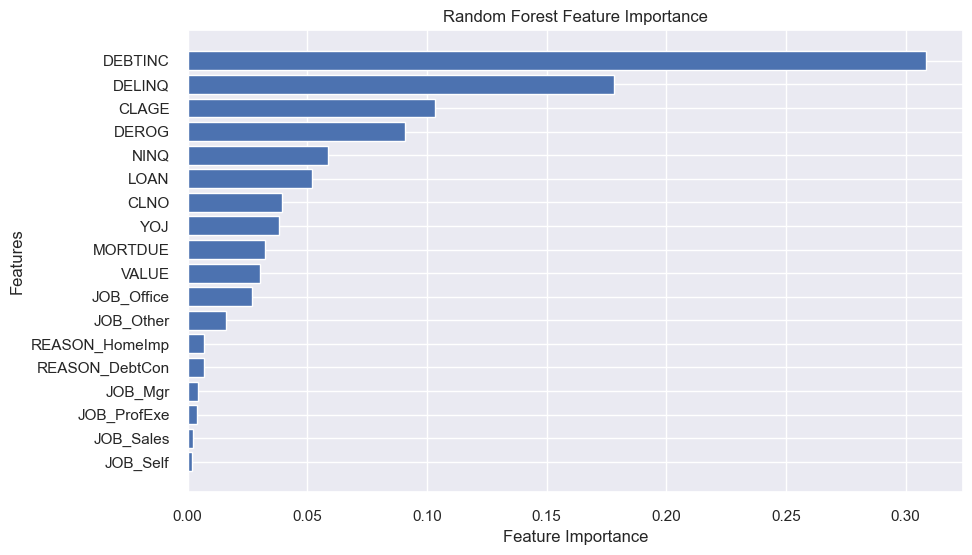

In [183]:
feature_importance = halve_RF.best_estimator_.feature_importances_
features = X_train1.columns  # Replace with the actual feature names

sorted_idx = np.argsort(feature_importance)
# Plot feature importance
plt.barh(range(len(features)), feature_importance[sorted_idx])
plt.yticks(range(len(features)), np.array(features)[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

## Accuracy, Precision & Recall

In [185]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test2.values, y_pred_RF22)
print(f'Accuracy: {accuracy}')

# Manually calculate precision, recall, and F1 score
tp = sum((y_test2.values == 1) & (y_pred_RF22 == 1))
tn = sum((y_test2.values == 0) & (y_pred_RF22 == 0))
fp = sum((y_test2.values == 0) & (y_pred_RF22 == 1))
fn = sum((y_test2.values == 1) & (y_pred_RF22 == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1 score
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

# Alternatively, you can use scikit-learn's classification report
print(classification_report(y_test2.values, y_pred_RF22))

Accuracy: 0.89937106918239
Precision: 1.0
Recall: 0.4482758620689655
F1 Score: 0.6190476190476191
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       260
           1       1.00      0.45      0.62        58

    accuracy                           0.90       318
   macro avg       0.95      0.72      0.78       318
weighted avg       0.91      0.90      0.88       318



## ROC-AUC curve for 2nd cluster

In [184]:
halve_RF.fit(X_train2, y_train2)
print('Best hyperparameters for second cluster in RF {} with {}'.format(halve_RF.best_score_, halve_RF.best_params_))
# Best hyperparameters for second cluster in RF 0.6565 with {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'auto','max_depth': 5, 'criterion': 'entropy'}

y_pred_RF2 = halve_RF.predict_proba(X_test2)[:,1]
y_pred_RF22 = halve_RF.predict(X_test2)
print('The ROC AUC score of RF for second cluster is {:.4f}'.format(roc_auc_score(y_test2, y_pred_RF2)))
# The ROC AUC score of RF for first cluster is 0.5906

Best hyperparameters for second cluster in RF 0.9189187371408026 with {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini'}
The ROC AUC score of RF for second cluster is 0.9483


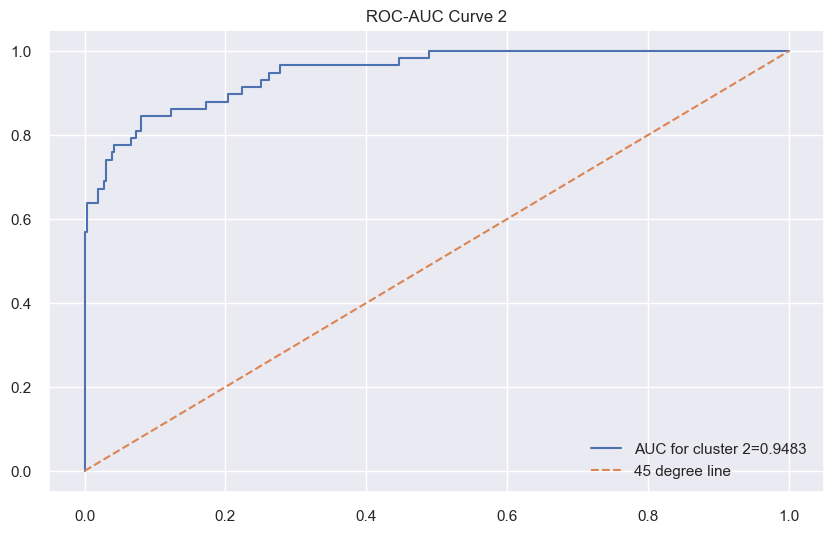

In [186]:
false_pos, true_pos, _ = roc_curve(y_test2.values,  y_pred_RF2)
auc = roc_auc_score(y_test2, y_pred_RF2)
plt.plot(false_pos,true_pos,label="AUC for cluster 2={:.4f} "
                  .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve 2')
plt.show()

## Feature Importance

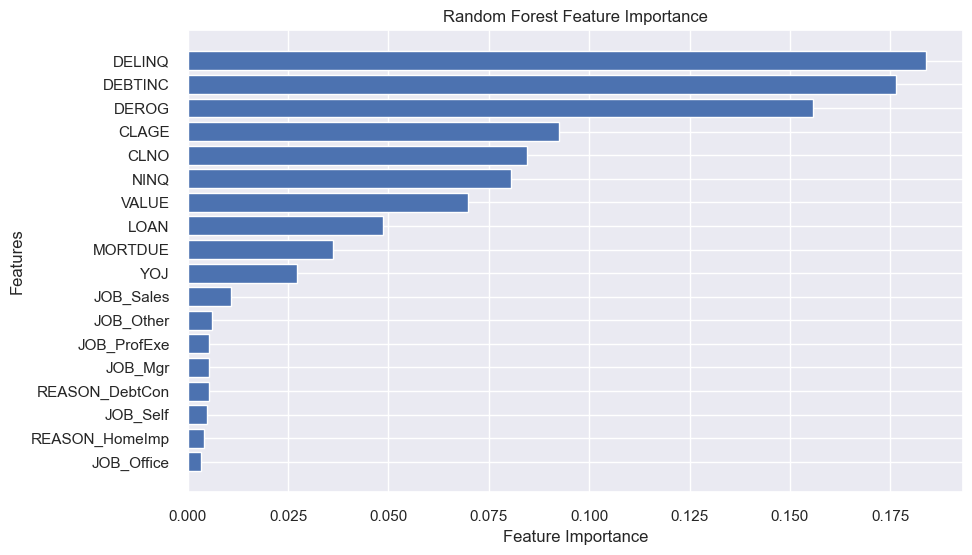

In [187]:
feature_importance = halve_RF.best_estimator_.feature_importances_
features = X_train2.columns  # Replace with the actual feature names

sorted_idx = np.argsort(feature_importance)
# Plot feature importance
plt.barh(range(len(features)), feature_importance[sorted_idx])
plt.yticks(range(len(features)), np.array(features)[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

# PD Estimation using Neural Network

## ROC-AUC curve for 1st cluster

In [188]:
from sklearn.neural_network import MLPClassifier

param_NN = {"hidden_layer_sizes": [(100, 50), (50, 50), (10, 100)],
                     "solver": ["lbfgs", "sgd", "adam"],
                     "learning_rate_init": [0.001, 0.05]}

MLP = MLPClassifier(random_state=42)

param_halve_NN = HalvingRandomSearchCV(MLP, param_NN,
                                                scoring = 'roc_auc')
param_halve_NN.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in NN are {}'.
               format(param_halve_NN.best_params_))
# Best hyperparameters for first cluster in NN are {'solver': 'lbfgs','learning_rate_init': 0.05, 'hidden_layer_sizes': (100, 50)}

y_pred_NN1 = param_halve_NN.predict_proba(X_test1)[:,1]
y_pred_NN11 = param_halve_NN.predict(X_test1)
print('The ROC AUC score of NN for first cluster is {:.4f}'.format(roc_auc_score(y_test1, y_pred_NN1)))
# The ROC AUC score of NN for first cluster is 0.5263

Best hyperparameters for first cluster in NN are {'solver': 'sgd', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 50)}
The ROC AUC score of NN for first cluster is 0.8081


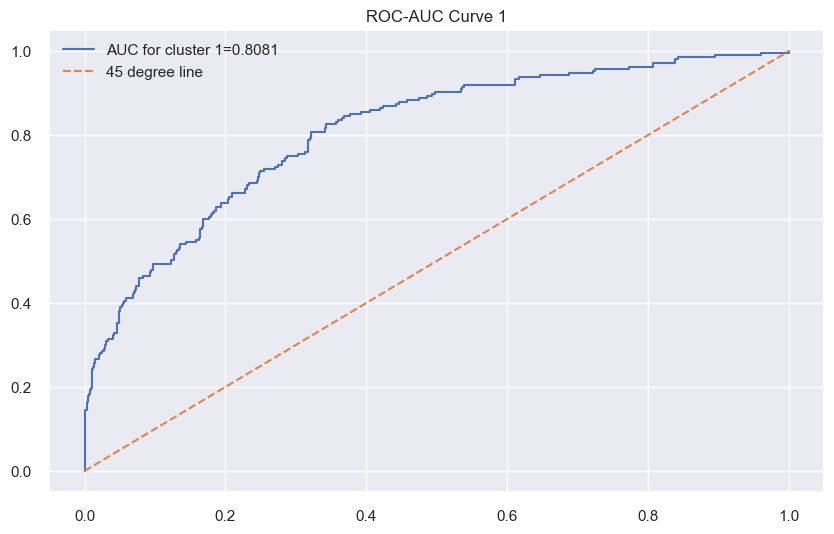

In [190]:
false_pos, true_pos, _ = roc_curve(y_test1.values,  y_pred_NN1)
auc = roc_auc_score(y_test1, y_pred_NN1)
plt.plot(false_pos,true_pos,label="AUC for cluster 1={:.4f} "
                  .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve 1')
plt.show()

## Accuracy, Precision & Recall

In [189]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test1.values, y_pred_NN11)
print(f'Accuracy: {accuracy}')

# Manually calculate precision, recall, and F1 score
tp = sum((y_test1.values == 1) & (y_pred_NN11 == 1))
tn = sum((y_test1.values == 0) & (y_pred_NN11 == 0))
fp = sum((y_test1.values == 0) & (y_pred_NN11 == 1))
fn = sum((y_test1.values == 1) & (y_pred_NN11 == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1 score
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

# Alternatively, you can use scikit-learn's classification report
print(classification_report(y_test1.values, y_pred_NN11))

Accuracy: 0.7437070938215103
Precision: 0.4717607973421927
Recall: 0.6859903381642513
F1 Score: 0.5590551181102361
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       667
           1       0.47      0.69      0.56       207

    accuracy                           0.74       874
   macro avg       0.68      0.72      0.69       874
weighted avg       0.79      0.74      0.76       874



## ROC-AUC curve for 2nd cluster

In [191]:
param_halve_NN.fit(X_train2, y_train2)
print('Best hyperparameters for first cluster in NN are {}'.format(param_halve_NN.best_params_))
#Best hyperparameters for first cluster in NN are {'solver': 'lbfgs','learning_rate_init': 0.05, 'hidden_layer_sizes': (10, 100)}

y_pred_NN2 = param_halve_NN.predict_proba(X_test2)[:,1]
y_pred_NN22 = param_halve_NN.predict(X_test2)
print('The ROC AUC score of NN for second cluster is {:.4f}'.format(roc_auc_score(y_test2, y_pred_NN2)))
#The ROC AUC score of NN for first cluster is 0.6155

Best hyperparameters for first cluster in NN are {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 50)}
The ROC AUC score of NN for second cluster is 0.9767


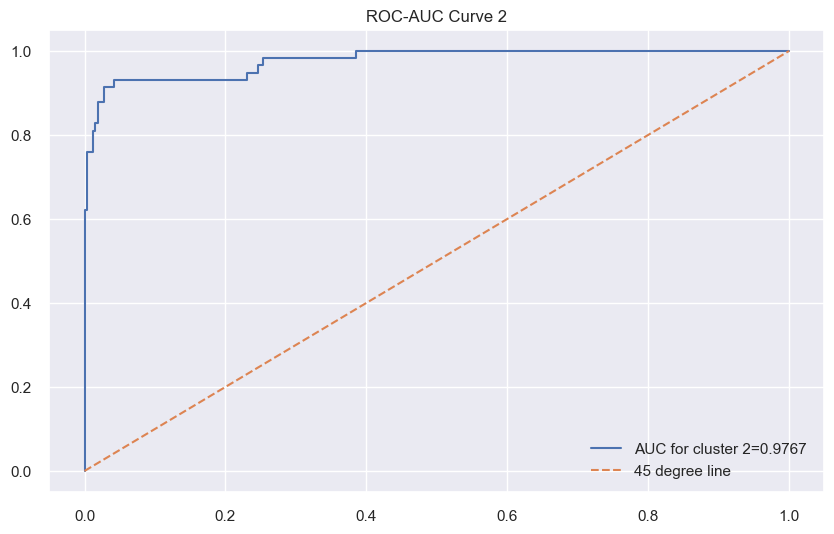

In [193]:
false_pos, true_pos, _ = roc_curve(y_test2.values,  y_pred_NN2)
auc = roc_auc_score(y_test2, y_pred_NN2)
plt.plot(false_pos,true_pos,label="AUC for cluster 2={:.4f} "
                  .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve 2')
plt.show()

## Accuracy, Precision & Recall

In [192]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test2.values, y_pred_NN22)
print(f'Accuracy: {accuracy}')

# Manually calculate precision, recall, and F1 score
tp = sum((y_test2.values == 1) & (y_pred_NN22 == 1))
tn = sum((y_test2.values == 0) & (y_pred_NN22 == 0))
fp = sum((y_test2.values == 0) & (y_pred_NN22 == 1))
fn = sum((y_test2.values == 1) & (y_pred_NN22 == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1 score
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

# Alternatively, you can use scikit-learn's classification report
print(classification_report(y_test2.values, y_pred_NN22))

Accuracy: 0.9559748427672956
Precision: 0.9074074074074074
Recall: 0.8448275862068966
F1 Score: 0.875
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       260
           1       0.91      0.84      0.88        58

    accuracy                           0.96       318
   macro avg       0.94      0.91      0.92       318
weighted avg       0.96      0.96      0.96       318

